In [42]:
# Import dependencies here
import tweepy
import pandas as pd
from matplotlib import pyplot as plt
import json
from pprint import pprint

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [10]:
# Twitter API Keys
consumer_key = "xNjdgA7DwaeXbgDWbhXLx0vJR"
consumer_secret = "4uU3npLXZyehh4Mega4lbLKPR2O8wh5DtOsDxKMPcFPPaqCav8"
access_token = "25262000-WGCRZ3a4Ez3b7indQrU0T7wip8PYpQek11FYBM88r"
access_token_secret = "SkoaVXB53Lt2zTm2gnnlqKZk1zevTu4xKu9JcNEy4eTYl"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [12]:
twitter_users = ['BBC', 'CBS', 'CNN', 'Fox', 'New York times']

In [60]:
user_tweets = {
    'user': [],
    'sentiment': [],
    'tweet_number': []
}

for user in twitter_users:
    public_tweets = api.user_timeline(user, count=100)
    i = 1
    for tweet in public_tweets:
        user_tweets['user'].append(user)
        user_tweets['sentiment'].append(analyzer.polarity_scores(tweet['text'])['compound'])
        user_tweets['tweet_number'].append(i)
        i += 1


In [61]:
# user_tweets['user'] = reversed(user_tweets['user'])
# user_tweets['sentiment'] = reversed(user_tweets['sentiment'])
# user_tweets['tweet_number'] = reversed(user_tweets['tweet_number'])

user_tweets_df = pd.DataFrame(user_tweets)
user_tweets_df

,sentiment,tweet_number,user
0,0.0000,1,BBC
1,0.2942,2,BBC
2,0.0000,3,BBC
3,0.0000,4,BBC
4,0.6114,5,BBC
5,0.0000,6,BBC
6,-0.3064,7,BBC
7,0.0000,8,BBC
8,0.0000,9,BBC
9,-0.5994,10,BBC


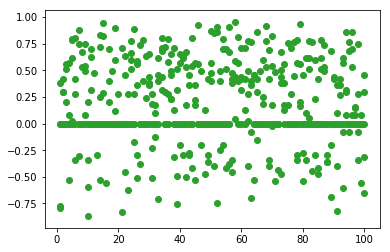

In [62]:
plt.scatter(user_tweets['tweet_number'], user_tweets['sentiment'], marker='o')
plt.show()